# Example 10.3: Rankine with Superheat

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
A Rankine cycle operates with water as the working fluid with a turbine inlet pressure of 3 MPa, a condenser pressure of 15 kPa, and superheat in the boiler to $550^\circ\mathrm{C}$.  For isentropic efficiencies of $\eta_t=0.8$ and $\eta_p=0.6$ and $\dot{W}_\text{Net}=1\ \mathrm{MW}$ Find:
* (a) Mass flow rate of steam (kg/s)
* (b) Boiler heat transfer (MW)
* (c) Thermal efficiency of the cycle
* (d) Sketch a $T$-$s$ diagram of the cycle

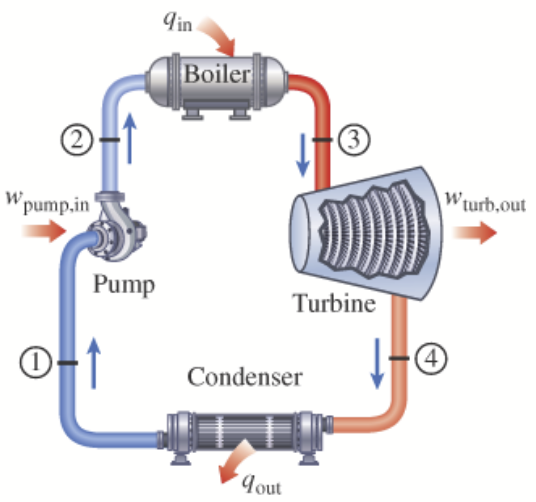

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=3074263&node=10465198&a=1419708881&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.kSI_C import *
   
water = realfluid.Properties('Water')

### Given Parameters
We now define variables to hold our known values.

In [3]:
p[3] = Quantity(3.0,'MPa')         # Turbine inlet pressure
p[1] = p[4] = Quantity(15.0,'kPa') # Condenser pressure
Wdot_net = Quantity(1,'MW')        # Net power 
eta_t = 0.8                        # Turbine isentropic efficiency
eta_p = 0.6                        # Pump isentropic efficiency

Calculations()
Summary();

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

,p
unit,kPa
1,15.0
3,3000.0
4,15.0


### Assumptions
- Non-ideal work devices
- Superheat in boiler: superheated vapor at boiler exit
- Single phase into pump: saturated liquid at condenser exit
- Isobaric heat exchagners
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [4]:
T[3] = Quantity(550,'degC') # Superheat
x[1] = 0      # Single phase into pump
p[2] = p[3]   # isobaric heat exchanger

Summary();

<IPython.core.display.Latex object>

,T,p,x
unit,°C,kPa,
1,-,15.0,0
2,-,3000.0,-
3,550,3000.0,-
4,-,15.0,-


#### (a) Mass flow rate

In [5]:
#### State 1)
states.fix(1,water)

#### 1-2) Non-ideal compression
# Isentropic compression
p['2s'] = p[2]
s['2s'] = s[1]
states.fix('2s',water)

# Actual compression
h[2] = h[1] + (h['2s']-h[1])/eta_p
states.fix(2,water)
w_1_to_2 = h[1]-h[2]

#### 2-3) Isobaric heat addition
states.fix(3,water)

#### 3-4) Non-ideal expansion
# Isentropic Expansion
p['4s'] = p[4]
s['4s'] = s[3]
states.fix('4s',water)

# Actual expansion
h[4] = h[3] - eta_t*(h[3]-h['4s'])
states.fix(4,water)
w_3_to_4 = h[3]-h[4]

#### Mass flow rate
w_net = w_1_to_2 + w_3_to_4
mdot = Wdot_net/w_net
mdot.ito('kg/s') 

Summary();

<IPython.core.display.Latex object>

,T,p,v,u,h,s,x,phase
unit,°C,kPa,m³/kg,kJ/kg,kJ/kg,kJ/K/kg,,
1,53.969313,15.0,0.001014,225.929071,225.944282,0.754865,0,twophase
2,54.566922,3000.0,0.001013,227.946954,230.985965,0.761023,N/A,liquid
2s,54.084027,3000.0,0.001013,225.930994,228.969291,0.754865,N/A,liquid
3,550.000000,3000.0,0.124368,3196.597544,3569.702948,7.376848,N/A,supercritical_gas
4,69.128978,15.0,10.495097,2470.212469,2627.638918,8.094805,N/A,gas
4s,53.969313,15.0,9.149419,2254.881622,2392.122910,7.376848,0.913098,twophase


#### (b) Boiler heat transfer (MW)

In [6]:
#### Boiler First Law
q_2_to_3 = h[3]-h[2]
Qdot_in = mdot*q_2_to_3

Calculations();

### Boiler First Law

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### (c) Thermal efficiency

In [7]:
eta_th = Wdot_net/Qdot_in
eta_th.ito('')

Calculations();

<IPython.core.display.Latex object>

#### (d) Diagrams

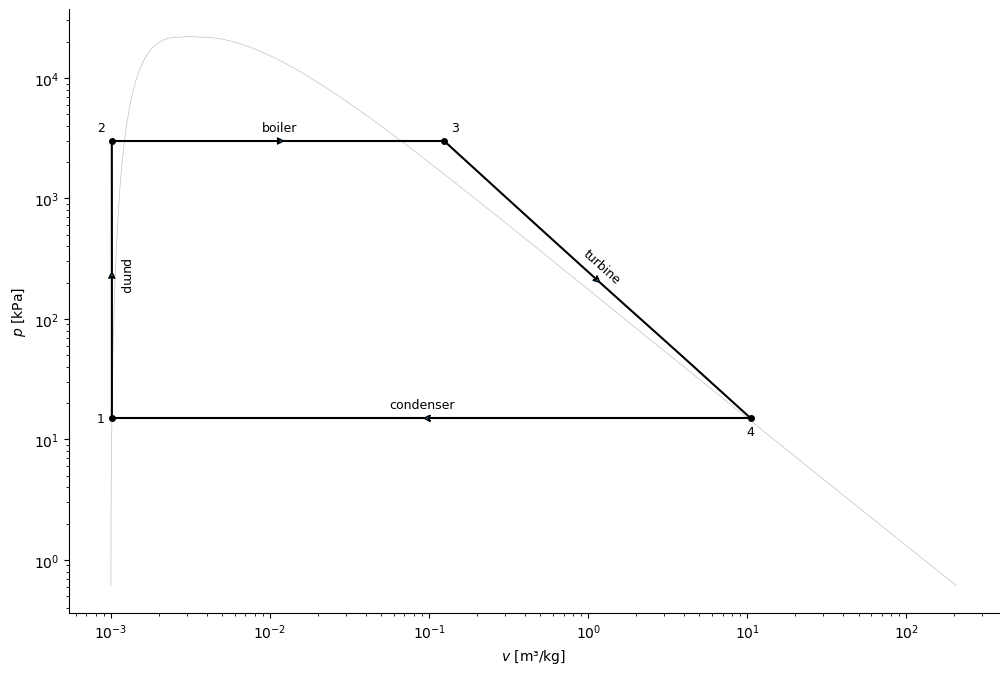

In [8]:
pv = water.pv_diagram()

for state in [1,2,3,4]:
    v[state] = water.v(p[state],h=h[state])

pv.plot_state(states[1],label_loc='west')
pv.plot_state(states[2],label_loc='north west')
pv.plot_state(states[3],label_loc='north east')
pv.plot_state(states[4],label_loc='south')

pv.plot_process(states[1],states[2],path='nonideal',label='pump')
pv.plot_process(states[2],states[3],path='isobaric',label='boiler')
pv.plot_process(states[3],states[4],path='nonideal',label='turbine')
pv.plot_process(states[4],states[1],path='isobaric',label='condenser');

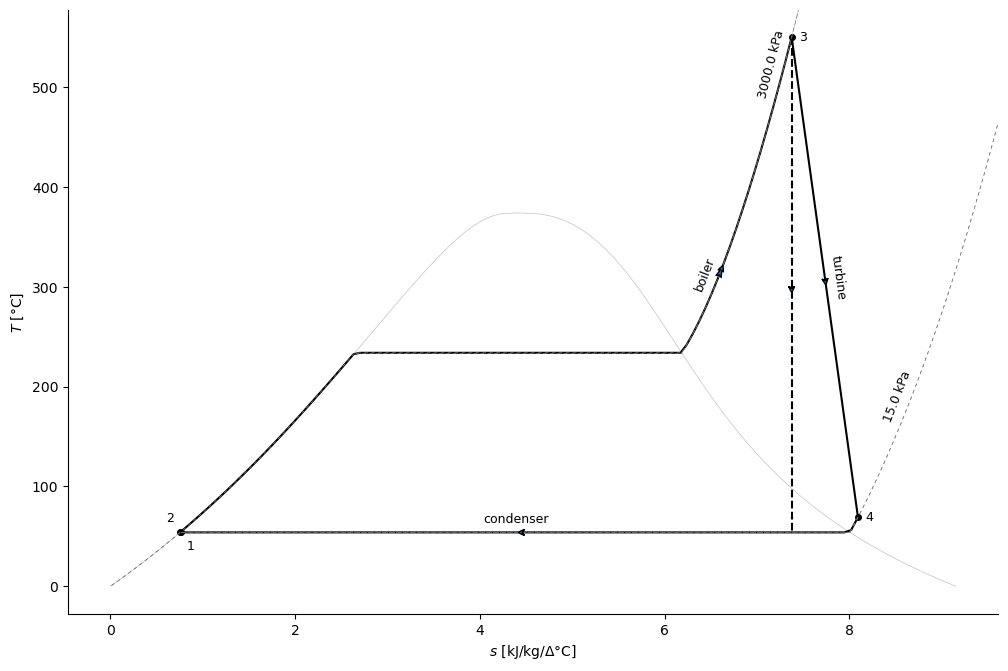

In [9]:
Ts = water.Ts_diagram()

Ts.plot_state(states[1],label_loc='south east')
Ts.plot_state(states[2],label_loc='north west')
Ts.plot_state(states[3],label_loc='east')
Ts.plot_state(states[4],label_loc='east')
    
Ts.plot_process(states[1],states[2],path='isentropic',arrow=False)
Ts.plot_process(states[2],states[3],path='isobaric',label='boiler')
Ts.plot_process(states[3],states[4],path='isentropic',label='turbine')
Ts.plot_process(states[4],states[1],path='isobaric',label='condenser');
Ts.plot_process(states[3],states['4s'],path='isentropic',linestyle='dashed');

Ts.plot_isobar(p[3],label=f'{p[3]}',pos=.9)
Ts.plot_isobar(p[4],label=f'{p[4]}',pos=.9);
